In [ ]:
# 파일 합치고 칼럼별로 플랏 혹은 데이터 형태 보기

In [1]:
# 5/26
import pandas as pd
import numpy as np
# 파일 저장및 불러오기 모듈
import bz2
import pickle
import _pickle as cPickle

In [2]:
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
# 불러온 데이터는 전처리 완료된 데이터들이 분할된 형태
data1 = decompress_pickle('texi_train/train1.pbz2')
data2 = decompress_pickle('texi_train/train2.pbz2')
data3 = decompress_pickle('texi_train/train3.pbz2')
df_list = []
df_list.append(data1)
df_list.append(data2)
df_list.append(data3)

In [3]:
texi_df = pd.concat(df_list, ignore_index=True)
texi_df.sample(10)

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,distance
51667097,48235637,11.0,2013-06-26 22:28:00+00:00,-73.957481,40.770779,-73.986809,40.750416,2013,6,26,22,0.035704
24881757,21187006,9.5,2013-09-10 08:40:00+00:00,-73.964035,40.766109,-73.977425,40.759308,2013,9,10,8,0.015018
11263010,34681635,15.5,2014-04-10 19:54:00+00:00,-73.983430,40.773594,-74.000860,40.737137,2014,4,10,19,0.040409
943550,2904981,4.5,2010-02-23 15:04:00+00:00,-73.958960,40.814983,-73.967000,40.805180,2010,2,23,15,0.012678
31084946,40286689,6.1,2011-11-01 23:24:00+00:00,-73.998817,40.732361,-73.984306,40.732033,2011,11,1,23,0.014515
40059905,12496211,8.5,2011-04-01 10:39:00+00:00,-73.988358,40.696354,-74.011337,40.708168,2011,4,1,10,0.025839
43752053,23865098,9.7,2009-08-07 09:51:00+00:00,-73.984169,40.731026,-73.992577,40.714241,2009,8,7,9,0.018773
22103864,12635053,7.3,2010-07-21 07:22:00+00:00,-73.992668,40.743038,-73.970154,40.761055,2010,7,21,7,0.028836
15583548,47983257,44.0,2015-02-05 22:29:00+00:00,-73.989730,40.744186,-73.867905,40.900986,2015,2,5,22,0.198564
46799501,33248897,10.5,2009-12-23 15:33:00+00:00,-73.986176,40.758495,-73.988922,40.757042,2009,12,23,15,0.003107


In [4]:
del data1, data2, data3, df_list

In [5]:
texi_df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,distance
0,0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841610,40.712276,2009,6,15,17,0.009437
1,3,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991570,40.758090,2012,4,21,4,0.025339
2,6,7.5,2012-11-20 20:35:00+00:00,-73.980000,40.751663,-73.973800,40.764843,2012,11,20,20,0.014565
3,9,8.9,2009-09-02 01:11:00+00:00,-73.980660,40.733870,-73.991540,40.758137,2009,9,2,1,0.026594
4,12,4.1,2009-11-06 01:04:00+00:00,-73.991600,40.744713,-73.983080,40.744682,2009,11,6,1,0.008520
...,...,...,...,...,...,...,...,...,...,...,...,...
54001756,55423841,6.5,2014-05-02 07:36:00+00:00,-73.989769,40.739101,-73.986870,40.751652,2014,5,2,7,0.012881
54001757,55423844,18.0,2015-06-13 20:45:00+00:00,-73.987335,40.755325,-74.015221,40.710213,2015,6,13,20,0.053035
54001758,55423847,6.1,2011-09-16 00:46:00+00:00,-73.990944,40.736618,-73.992294,40.740314,2011,9,16,0,0.003935
54001759,55423850,4.5,2015-03-22 16:37:00+00:00,-73.981056,40.737457,-73.985474,40.729298,2015,3,22,16,0.009279


In [ ]:
# 날짜를 요일로 변환
def plot_day_trend(year) :
    day_count = complete_dat[complete_dat["year"] == year]["week_day"].value_counts().reset_index()
    day_count.columns = ["day","count"]
    day_count["order"]  = day_count["day"].replace({"Sunday" :1,'Monday' : 2, 'Tuesday': 3,
                                                    'Wednesday':4,'Thursday' :5, 'Friday':6,
                                                    'Saturday':7})
    day_count = day_count.sort_values(by = "order",ascending  = True)
    
    tracer = go.Bar(x = day_count["day"],y = day_count["count"],
                    name = year,marker = dict(line = dict(width =1))
                   )
    
    return tracer

#layout
layout = go.Layout(dict(title = "Trend in trips  by weekdays",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "weekday",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

t  = plot_day_trend(2009)
t1 = plot_day_trend(2010)
t2 = plot_day_trend(2011)
t3 = plot_day_trend(2012)
t4 = plot_day_trend(2013)
t5 = plot_day_trend(2014)

data = [t,t1,t2,t3,t4,t5]
py.iplot(go.Figure(data = data,layout=layout))

In [6]:
# 플라 형식 배운거 대충 모아봄
import matplotlib.pyplot as plt
import seaborn as sns

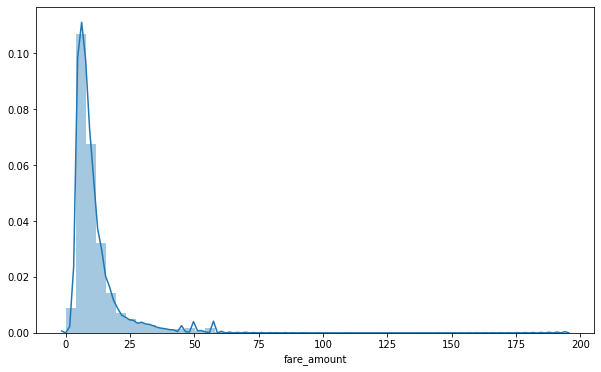

In [14]:
#1. 요금
plt.figure(figsize=(10,6))
sns.distplot(texi_df.sample(100000)["fare_amount"])


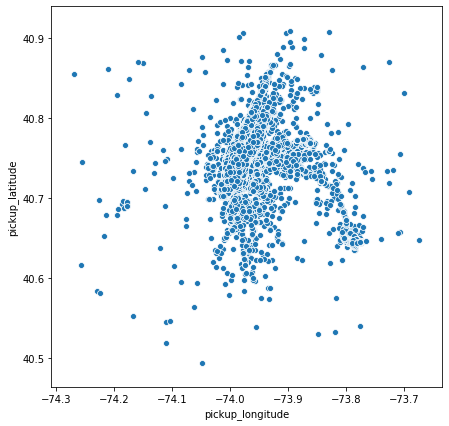

In [15]:
#2. 승차지점 위경도 기반 플랏
plt.figure(figsize=(7,7))
sns.scatterplot(data=texi_df.sample(100000), x="pickup_longitude", y="pickup_latitude")

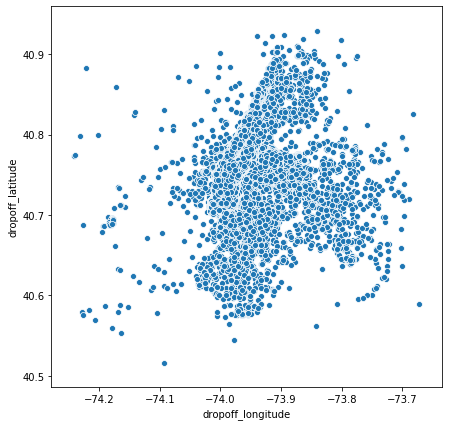

In [16]:
#3. 하차지점 위경도 기반 플랏
plt.figure(figsize=(7,7))
sns.scatterplot(data=texi_df.sample(100000), x="dropoff_longitude", y="dropoff_latitude")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

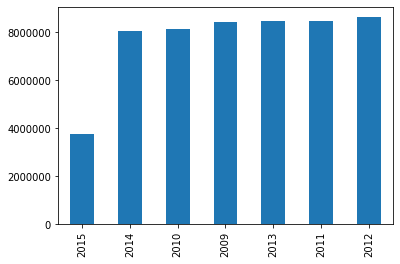

In [30]:
#4-1. 년도별 분포
texi_df["year"].value_counts().sort_values().plot.bar()


(array([8413218., 8156734.,       0., 8484622.,       0., 8625721.,
        8475461.,       0., 8068149., 3777856.]),
 array([2009. , 2009.6, 2010.2, 2010.8, 2011.4, 2012. , 2012.6, 2013.2,
        2013.8, 2014.4, 2015. ]),
 <a list of 10 Patch objects>)

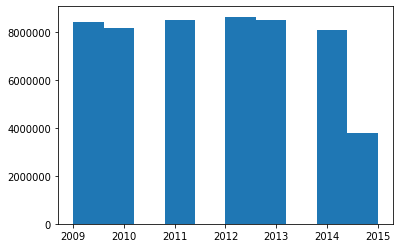

In [32]:
plt.hist(texi_df["year"])

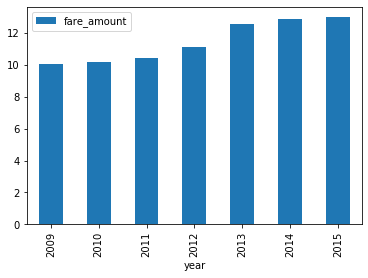

In [23]:
#4-2. 년도별 요금평균
texi_df[['year','fare_amount']].groupby('year').mean().plot.bar()

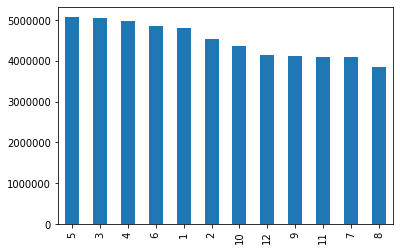

In [37]:
# 5.월별 분포
texi_df["month"].value_counts().plot.bar()

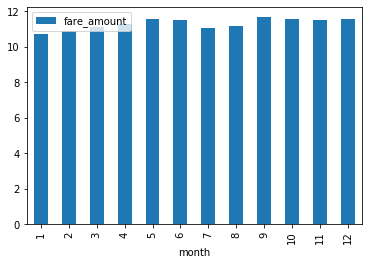

In [35]:
#5-2. 월별 요금평균
texi_df[['month','fare_amount']].groupby('month').mean().plot.bar()

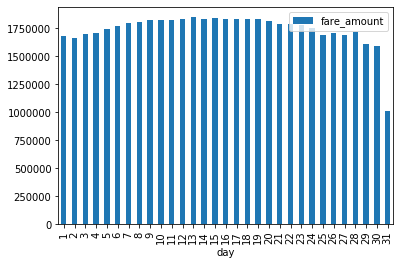

In [42]:
# 6.일별 분포 - 주말이냐 평일이냐에 집중해야할듯?
texi_df[['day','fare_amount']].groupby('day').count().plot.bar()

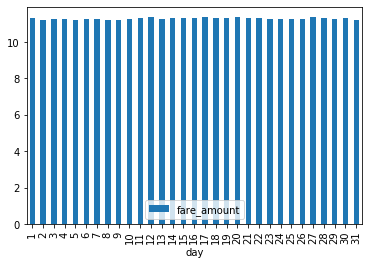

In [39]:
#6-2. 일별 요금평균
texi_df[['day','fare_amount']].groupby('day').mean().plot.bar()

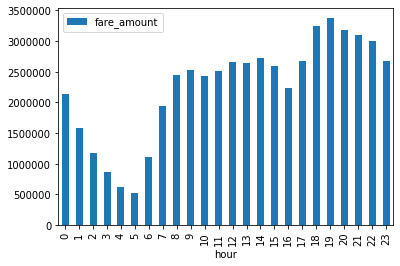

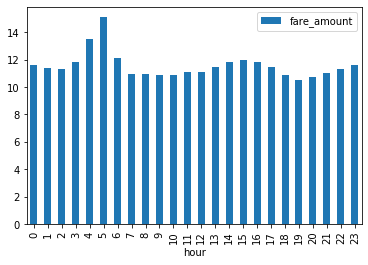

In [43]:
# 7.승차시간대별 분포 - 
texi_df[['hour','fare_amount']].groupby('hour').count().plot.bar()
#7-2. 시간대별 요금평균
texi_df[['hour','fare_amount']].groupby('hour').mean().plot.bar()

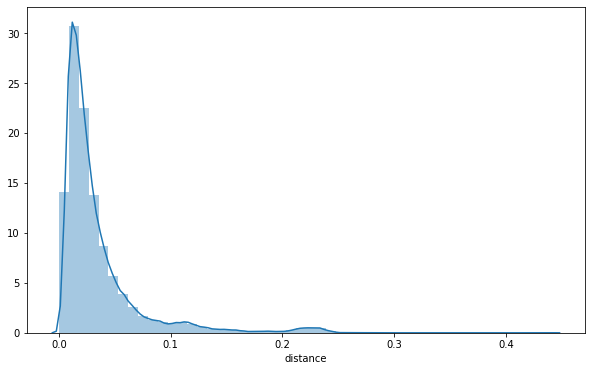

In [44]:
#8. 거리
plt.figure(figsize=(10,6))
sns.distplot(texi_df.sample(100000)["distance"])


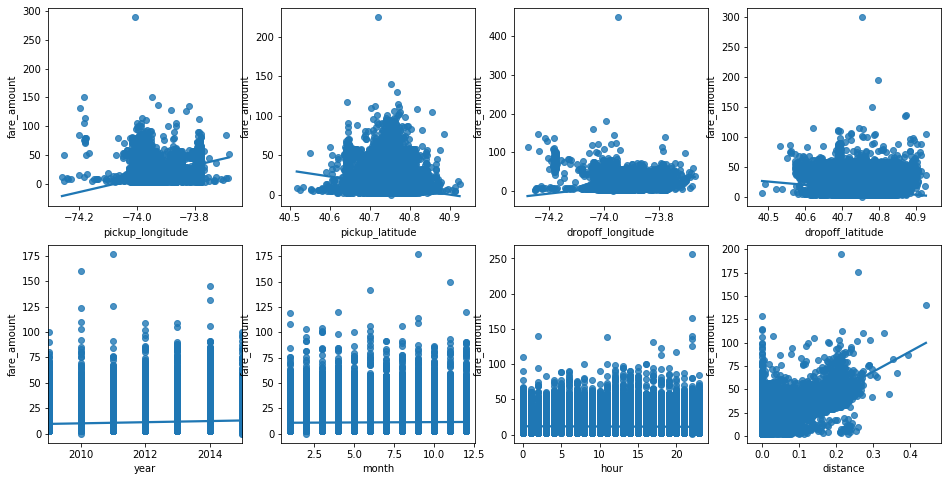

In [45]:
# 9. 각 독립변수가 종속변수에 미치는 영향
# pickup_datetime	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	year	month	day	hour	distance
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['pickup_longitude', 'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude', 'year', 'month' ,'hour' ,'distance']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='fare_amount', data=texi_df.sample(100000), ax= axs[row][col])

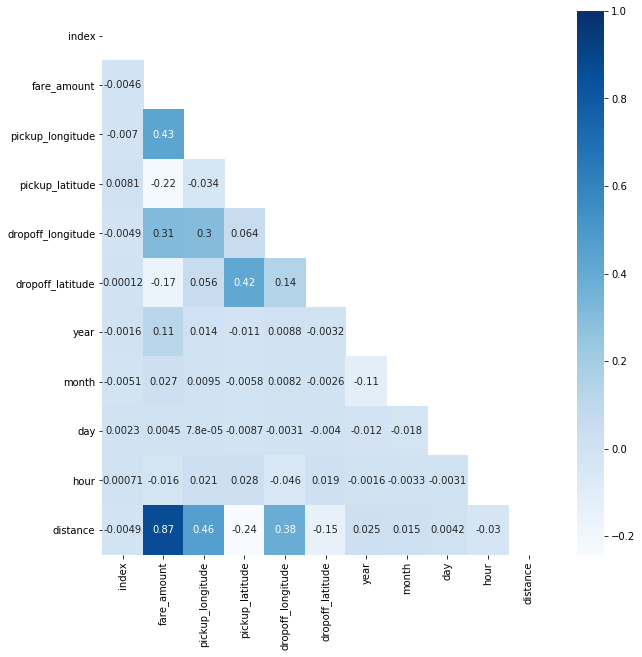

In [49]:
#10. 상관성
# 상관게수 시각화
corr = texi_df.sample(100000).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

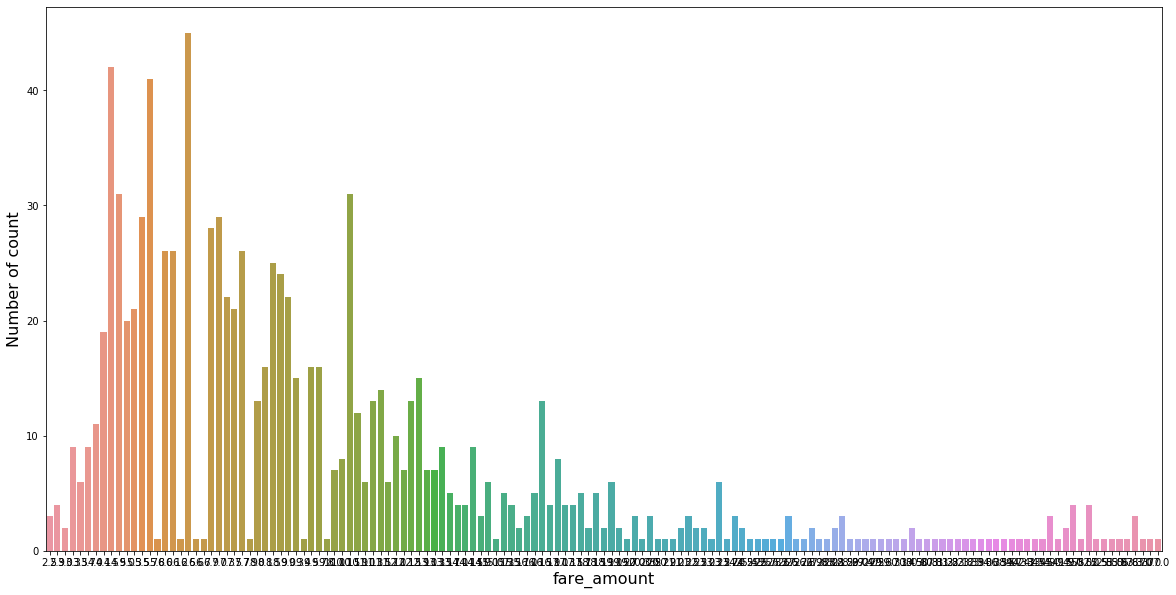

In [8]:
plt.figure(figsize=(20,10))
fare = sns.countplot('fare_amount', data=texi_df[:1000])
# fare.set_title("Number of Runner by State - USA", fontsize=20)
fare.set_xlabel("fare_amount", fontdict={'size':16})
fare.set_ylabel("Number of count", fontdict={'size':16})
plt.show()

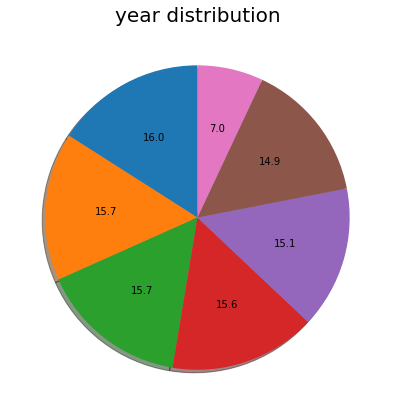

In [10]:
plt.figure(figsize=(7,7))
exp = (0, 0.1)
plt.pie(texi_df['year'].value_counts(), startangle=90, shadow=True, autopct="%.1f")
plt.title("year distribution", fontsize=20)
plt.show()

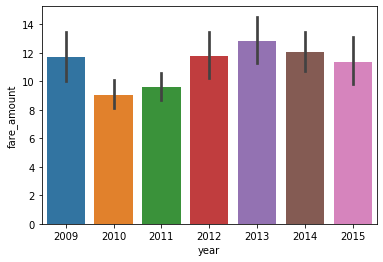

In [15]:
sns.barplot(texi_df["year"][:1000], texi_df["fare_amount"][:1000])

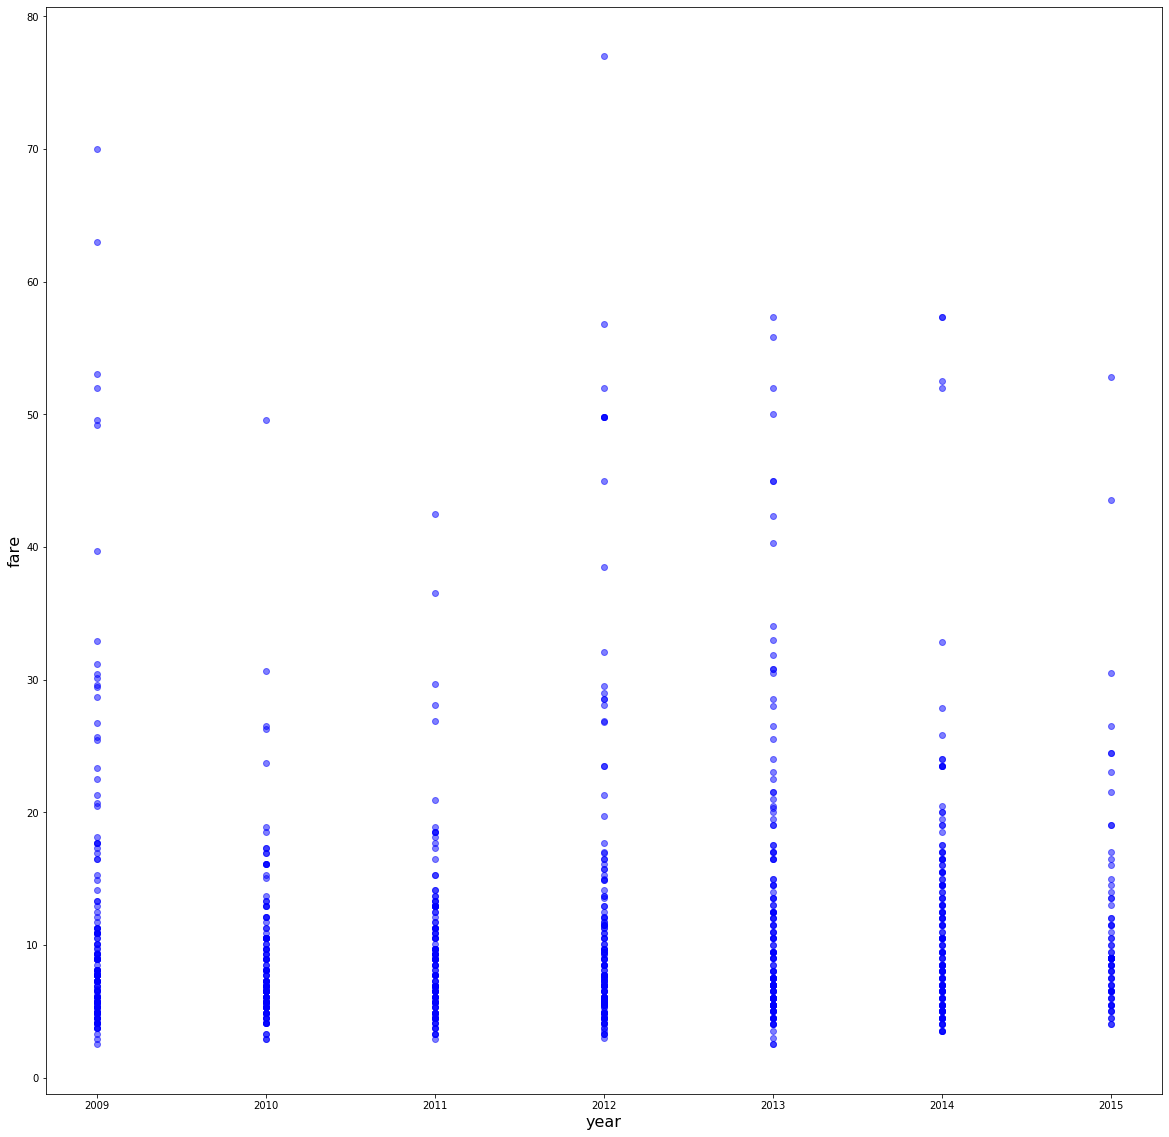

In [16]:
# 차트 크기를 설정
plt.figure(figsize=(20,20))
#
y_fare = texi_df['fare_amount'][:1000]
x_year = texi_df["year"][:1000]
plt.plot(x_year, y_fare, 'o', color='b', alpha=0.5)
plt.xlabel("year", fontsize=16)
plt.ylabel("fare", fontsize=16)
plt.show()


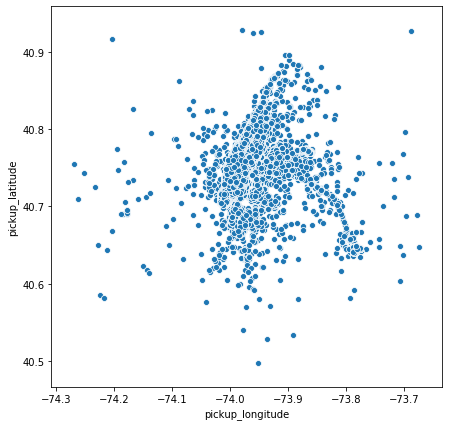

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(7,7))
sns.scatterplot(data=texi_df.sample(100000), x="pickup_longitude", y="pickup_latitude")

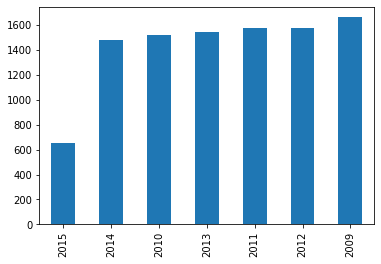

In [28]:
texi_df.sample(10000)["year"].value_counts().sort_values().plot.bar()

In [29]:
# 각 변수의 상관계수를 구합니다.
corr = texi_df.sample(10000).corr()
corr

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,distance
index,1.000000,-0.012076,0.003195,0.018798,0.006159,-0.001898,0.000619,-0.004256,0.005169,0.003522,-0.005815
fare_amount,-0.012076,1.000000,0.438641,-0.226147,0.346532,-0.189221,0.114042,0.041782,0.002186,-0.013556,0.885551
pickup_longitude,0.003195,0.438641,1.000000,-0.048211,0.307442,0.064018,0.008704,0.024694,-0.001080,0.024085,0.457095
pickup_latitude,0.018798,-0.226147,-0.048211,1.000000,0.030465,0.419689,-0.021598,-0.004356,0.015140,0.027960,-0.248850
dropoff_longitude,0.006159,0.346532,0.307442,0.030465,1.000000,0.091945,0.001306,0.010038,-0.012816,-0.053691,0.428769
dropoff_latitude,-0.001898,-0.189221,0.064018,0.419689,0.091945,1.000000,-0.016239,-0.003655,0.008464,0.024543,-0.169494
year,0.000619,0.114042,0.008704,-0.021598,0.001306,-0.016239,1.000000,-0.118454,0.006623,0.011054,0.014578
month,-0.004256,0.041782,0.024694,-0.004356,0.010038,-0.003655,-0.118454,1.000000,-0.022757,0.002304,0.029600
day,0.005169,0.002186,-0.001080,0.015140,-0.012816,0.008464,0.006623,-0.022757,1.000000,0.012248,-0.000546
hour,0.003522,-0.013556,0.024085,0.027960,-0.053691,0.024543,0.011054,0.002304,0.012248,1.000000,-0.021972


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


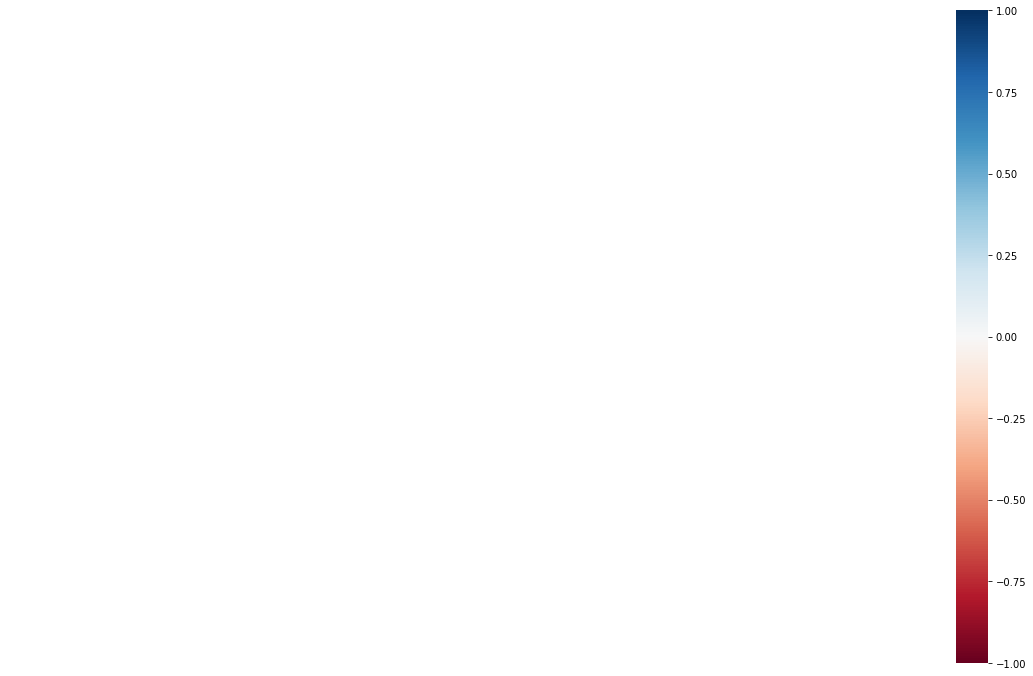

In [46]:
# 상관분석
import missingno as msno
msno.heatmap(texi_df.sample(10000))

In [ ]:
sns.heatmap(texi_df.sample(10000))

In [35]:
texi_df.columns

Index(['index', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year',
       'month', 'day', 'hour', 'distance'],
      dtype='object')

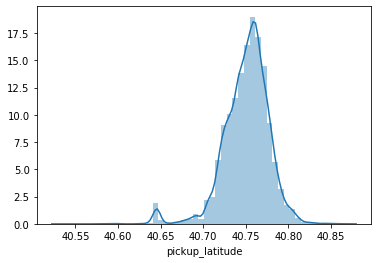

In [33]:
sns.distplot(texi_df.sample(10000)["pickup_latitude"])

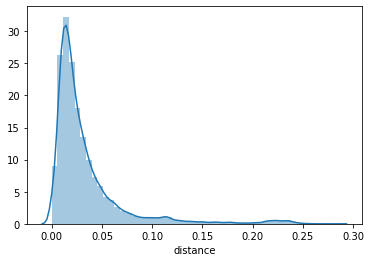

In [42]:
sns.distplot(texi_df.sample(10000)["distance"])

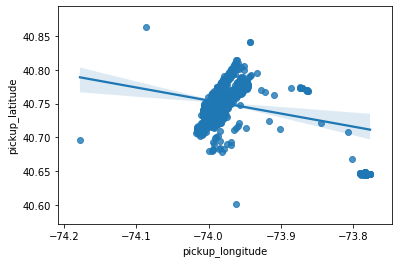

In [34]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=texi_df.sample(1000), x="pickup_longitude", y="pickup_latitude")

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(data=texi_df, x="pickup_longitude", y="pickup_latitude", hue="hour")
plt.legend(bbox_to_anchor=(1.02, 1),loc=2,borderaxespad=0.)